# IMDB Dataset

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#This line gives retrieves the data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#These lines helps to decode the review
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for key, value in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test  = np.asarray(train_labels).astype("float32")

#Now we define the model
model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
               loss="binary_crossentropy",
               metrics=["accuracy"])

# x_val = x_train[:1000]
# partial_x_train = x_train[1000:]
# y_val = y_train[:1000]
# partial_y_train = y_train[1000:]

history = model.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512,)
                    # validation_data=(x_val, y_val))


model.predict(x_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1556 - accuracy: 0.7769
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.0705 - accuracy: 0.9078
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.0493 - accuracy: 0.9367
Epoch 4/4
49/49 [==============================] - 1s 13ms/step - loss: 0.0329 - accuracy: 0.9595


array([[3.8397638e-04],
       [9.9997830e-01],
       [9.2598599e-01],
       ...,
       [7.1996436e-02],
       [1.3161467e-02],
       [8.7750983e-01]], dtype=float32)

# Reuters Dataset

**A multiclass classification example**
In this example we take data from the Reuters dataset in keras and classify the data into 46 mutually exclusive topics

**Loading data from the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Now we find a way to decode the data just have a peek at the data

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict((value, key) for (key, value) in word_index.items())
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, "?") for i in train_data[0]]) #We skip the first 3 indices because they belong to "padding", "start of sequence", "unknown"

print(decoded_newswire)
print(test_data)
print(test_labels)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
[list([1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192

We now vectorise training and test data in the same way we did for the imdb set

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros(shape = (len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      result[i, j] = 1
  return result

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

We now make a categorical encoding for the labels

In [ ]:
def to_one_hot(labels, dimension=46):
  result = np.zeros(shape=(len(labels), dimension))
  for i, label in enumerate(labels):
    result[i, label] = 1
  return result

y_train = to_one_hot(train_labels)
y_test  = to_one_hot(test_labels)

We use a 3 dense layers where the first 2 are of 64 units since we have to categorize into 46 topics.
RMSProp and categorical-crossentropy will be used as optimizer and loss functions

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras

model = keras.Sequential([
                          layers.Dense(64, activation='relu'),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(46, activation='softmax')
])

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Now we would make a validation set to determine additional parameters

In [ ]:
partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]
x_val = x_train[:1000]
y_val = y_train[:1000]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 4s 31ms/step - loss: 2.4645 - accuracy: 0.5408 - val_loss: 1.6532 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.3603 - accuracy: 0.7140 - val_loss: 1.2936 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0283 - accuracy: 0.7793 - val_loss: 1.1346 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8188 - accuracy: 0.8202 - val_loss: 1.0264 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6538 - accuracy: 0.8566 - val_loss: 0.9504 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5252 - accuracy: 0.8879 - val_loss: 0.9260 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4237 - accuracy: 0.9099 - val_loss: 0.9041 - val_accuracy: 0.8070
Epoch 8/20
16

The accuracy and loss occured while processing the validation set can be charted using matplotlib

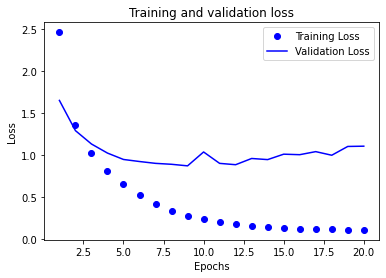

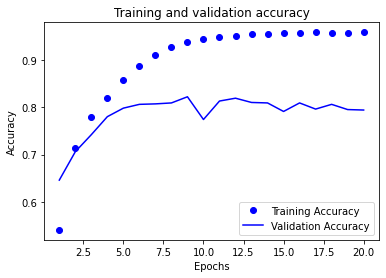

In [ ]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Now we retrain our model from scratch with above informations in mind

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras

model = keras.Sequential([
                          layers.Dense(64, activation="relu"),
                          layers.Dense(64, activation="relu"),
                          layers.Dense(46, activation="softmax")
])

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512
)

print(model.evaluate(x_test, y_test))

Epoch 1/9
18/18 [==============================] - 1s 13ms/step - loss: 2.4908 - accuracy: 0.5352
Epoch 2/9
18/18 [==============================] - 0s 12ms/step - loss: 1.3424 - accuracy: 0.7131
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 0.9950 - accuracy: 0.7889
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.7736 - accuracy: 0.8377
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 0.6067 - accuracy: 0.8743
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 0.4852 - accuracy: 0.8996
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3881 - accuracy: 0.9178
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3158 - accuracy: 0.9305
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9459 - accuracy: 0.7988
[0.9459179639816284, 0.7987533211708069]


# Predicting House Prices

Loading the boston housing dataset

In [1]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


Normalising the data

In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

building your own model

In [4]:
from tensorflow.keras import layers
from tensorflow import keras

def build_model():
  model = keras.Sequential([
                          layers.Dense(64, activation="relu"),
                          layers.Dense(64, activation="relu"),
                          layers.Dense(1)
  ])
  
  model.compile(
      optimizer="rmsprop",
      loss="mse",
      metrics=["mae"]
  )

  return model

We now use the K-Validation fold to get a grip of the validation set

In [8]:
import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")

  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1) * num_val_samples:]],
       axis=0)
  
  model   = build_model()
  history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0, 
            validation_data = (val_data, val_targets))
  
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

#The best epoch value can be figured ourt from the all_mae_histories
#For the time being I am believing what is in the book and naively choosing the value selected in it

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


Training the final model

In [6]:
model = build_model()
model.fit(train_data, train_targets, epochs = 130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 15.4058 - mae: 2.6270
2.6269943714141846
